<h1>HR Retention - Which Employees May Quit (Streamlined Study)</h1> 

<h2>About our Dataset</h2>

Source - hr_data csv data and employee_satisfaction excel data

<h2>Field Descriptions</h2>

- employee_id - Employee's ID 
- number_project - number of projects conducted by employee
- average_montly_hours - average number of hours spent on work
- time_spend_company - time employee has been with the company
- Work_accident - number of work accidents
- left - if employee has left (1, 0)
- promotion_last_5years - if employee has been promoted in the last 5 years (1, 0)
- department - Categorical data showing employee department
- salary - Categorical data with three salary buckets: low, medium, high
- satisfaction_level - Employee Satisfaction rating indicating between 0 and 1
- last_evaluation - How employee did as part of their last evaluation rating indicting between 0 and 1

**Aim** - What variables (if any) are correlated with why an Employee may leave?

<h2>About our Dataset</h2>

Source - hr_data csv data and employee_satisfaction excel data

<h2>Field Descriptions</h2>

- employee_id - Employee's ID 
- number_project - number of projects conducted by employee
- average_montly_hours - average number of hours spent on work
- time_spend_company - time employee has been with the company
- Work_accident - number of work accidents
- left - if employee has left (1, 0)
- promotion_last_5years - if employee has been promoted in the last 5 years (1, 0)
- department - Categorical data showing employee department
- salary - Categorical data with three salary buckets: low, medium, high
- satisfaction_level - Employee Satisfaction rating indicating between 0 and 1
- last_evaluation - How employee did as part of their last evaluation rating indicting between 0 and 1

**Aim** - What variables (if any) are correlated with why an Employee may leave?

<h2>Loading Main HR Database Records</h2>

In [1]:
import pandas as pd
hr_df = pd.read_csv("D:\AnacondaProjects\ds_biz_case_studies\datasets\hr_data.csv")

hr_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [2]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [4]:
# Display columns that have categorical data only
hr_df.select_dtypes(exclude=['int64']).columns

Index(['department', 'salary'], dtype='object')

In [5]:
def printUniques(new_list):
    for values in new_list:
        print(f'  {values}')

In [6]:
unique_dept_values = hr_df['department'].unique()
unique_salary_values = hr_df['salary'].unique()

print('=============================================================')
print(f'These are unique values for department: ')
printUniques(unique_dept_values)
print('=============================================================')
print(f'These are unique values for salary: ')
printUniques(unique_salary_values)

These are unique values for department: 
  sales
  accounting
  hr
  technical
  support
  management
  IT
  product_mng
  marketing
  RandD
These are unique values for salary: 
  low
  medium
  high


<h2>Loading Evaluation & Employee Satisfaction Data</h2>

In [7]:
import pandas as pd
emp_satis = pd.read_excel("D:\AnacondaProjects\ds_biz_case_studies\datasets\employee_satisfaction_evaluation.xlsx")

emp_satis.describe()

,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14972.000000,14972.000000
mean,45424.627575,0.612830,0.716125
std,25915.900127,0.248714,0.171138
min,1003.000000,0.090000,0.360000
25%,22872.500000,0.440000,0.560000
50%,45448.000000,0.640000,0.720000
75%,67480.500000,0.820000,0.870000
max,99815.000000,1.000000,1.000000


In [8]:
emp_satis.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [9]:
emp_satis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
EMPLOYEE #            14999 non-null int64
satisfaction_level    14972 non-null float64
last_evaluation       14972 non-null float64
dtypes: float64(2), int64(1)
memory usage: 351.6 KB


<h2>Merging Data between HR CSV and Employee Satisfaction Excel Sheet</h2>

In [10]:
main_df = hr_df.set_index('employee_id').join(emp_satis.set_index('EMPLOYEE #'))
main_df = main_df.reset_index() #resetting index to create flattened array
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [11]:
main_df[main_df.isnull().any(axis=1)] #displaying records with null values for satisfaction_level and/or last_evaluation

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [12]:
main_df.fillna(main_df.mean(), inplace=True)
summary_data = main_df[['employee_id', 'satisfaction_level', 'last_evaluation']].fillna(main_df.mean())


#main_df[(main_df.employee_id == 81315) | (main_df.employee_id == 78780) | (main_df.employee_id == 70005)] 
summary_data[summary_data.employee_id.isin([81315, 78780, 70005])]

,employee_id,satisfaction_level,last_evaluation
11967,70005,0.82000,0.716125
13482,78780,0.58000,0.716125
13925,81315,0.61283,0.750000


In [13]:
# Removing Employee ID column (isn't a metric that will influence ML Model) to lessen overall dataset 
main_df_fin = main_df.drop(columns='employee_id')
main_df_fin.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [14]:
main_df_fin['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [15]:
# Creating a group by to determine overall totals 
main_df_fin.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [16]:
main_df_fin.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [17]:
# Renaming values for presentation of Pseudo Correlation Maxtrix in next cell
main_df_fin = main_df_fin.rename(columns={'number_project': 'num_of_projs', 'average_montly_hours': 'avg_monthly_hrs', 'time_spend_company': 'time_spent_at_comp', 'Work_accident': 'work_accident', 'department': 'dept'})
main_df_fin.head()

,num_of_projs,avg_monthly_hrs,time_spent_at_comp,work_accident,left,promotion_last_5years,dept,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


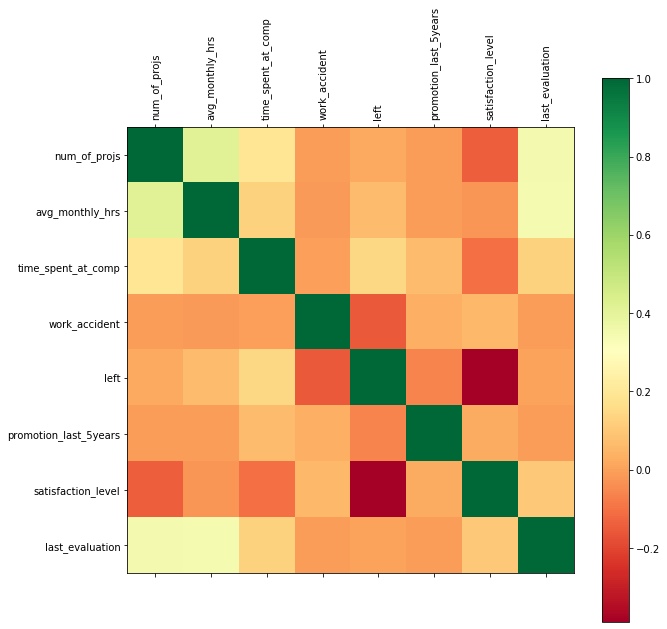

In [22]:
import matplotlib.pyplot as plt

def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    cax = ax.matshow(corr, cmap=plt.cm.RdYlGn)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_fin)

In [23]:
def plot_corr(df):
    """Stylizes Correlation Table into a Pseudo Correlation Matrix with a precision level set at 2
    
    Input: 
        df: pandas Dataframe"""
    corr = df.corr()
    return corr.style.background_gradient(cmap=plt.cm.RdYlGn, axis=None).set_precision(2)


plot_corr(main_df_fin)

,num_of_projs,avg_monthly_hrs,time_spent_at_comp,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
num_of_projs,1,0.42,0.2,-0.0047,0.024,-0.0061,-0.14,0.35
avg_monthly_hrs,0.42,1,0.13,-0.01,0.071,-0.0035,-0.021,0.34
time_spent_at_comp,0.2,0.13,1,0.0021,0.14,0.067,-0.1,0.13
work_accident,-0.0047,-0.01,0.0021,1,-0.15,0.039,0.059,-0.0068
left,0.024,0.071,0.14,-0.15,1,-0.062,-0.39,0.0069
promotion_last_5years,-0.0061,-0.0035,0.067,0.039,-0.062,1,0.026,-0.0078
satisfaction_level,-0.14,-0.021,-0.1,0.059,-0.39,0.026,1,0.1
last_evaluation,0.35,0.34,0.13,-0.0068,0.0069,-0.0078,0.1,1


<h2>Preparing Dataset for ML</h2>

In [24]:
# Perform one hot encoding on Categorical Data
categorical = ['dept', 'salary']
main_df_fin = pd.get_dummies(main_df_fin, columns=categorical, drop_first=True)
main_df_fin.head()

,num_of_projs,avg_monthly_hrs,time_spent_at_comp,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [25]:
main_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
num_of_projs             14999 non-null int64
avg_monthly_hrs          14999 non-null int64
time_spent_at_comp       14999 non-null int64
work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
dept_RandD               14999 non-null uint8
dept_accounting          14999 non-null uint8
dept_hr                  14999 non-null uint8
dept_management          14999 non-null uint8
dept_marketing           14999 non-null uint8
dept_product_mng         14999 non-null uint8
dept_sales               14999 non-null uint8
dept_support             14999 non-null uint8
dept_technical           14999 non-null uint8
salary_low               14999 non-null uint8
salary_medium            14999 non-null uint8
dtypes: float

In [26]:
# Number of employees that left
len(main_df_fin.loc[main_df_fin['left'] == 1])

3571

In [27]:
from sklearn.model_selection import train_test_split

# Remove label values from training data
X = main_df_fin.drop(['left'], axis=1).values

# Assign label values to Y dataset
y = main_df_fin['left'].values

In [28]:
# Split to a 70:30 Ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
# Normalize the data - because of differing data values.
# ML model will place higher importance to data with higher values and lower importance to data with lower values
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# y doesn't need to be scaled because it's just 0 and 1

In [30]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.653141,-1.326712,-0.344016,2.422102,-0.14459,-0.131336,-1.369429,-0.229887,-0.230346,4.332681,-0.206653,-0.24858,-0.252445,-0.625124,-0.415232,-0.470965,-0.973028,1.145668
1,-0.653141,-0.524447,-1.026136,-0.412864,-0.14459,-0.692962,-0.375763,-0.229887,-0.230346,-0.230804,-0.206653,-0.24858,-0.252445,-0.625124,-0.415232,-0.470965,1.027720,-0.872853
2,0.975678,-0.323881,-1.026136,-0.412864,-0.14459,1.352963,-0.960273,-0.229887,-0.230346,-0.230804,-0.206653,-0.24858,-0.252445,-0.625124,2.408292,-0.470965,1.027720,-0.872853
3,0.975678,-0.684900,-1.026136,-0.412864,-0.14459,0.229710,0.325648,-0.229887,-0.230346,-0.230804,-0.206653,-0.24858,-0.252445,-0.625124,2.408292,-0.470965,-0.973028,1.145668
4,0.161268,-0.785183,-1.026136,-0.412864,-0.14459,0.630872,-0.784920,-0.229887,-0.230346,-0.230804,-0.206653,-0.24858,-0.252445,-0.625124,2.408292,-0.470965,-0.973028,1.145668


In [31]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-1.310611e-16,-1.012408e-16,1.316067e-15,-3.587525e-16,-1.701055e-15,3.347866e-14,1.675664e-14,2.092917e-16,3.851572e-16,2.780369e-16,4.140627e-16,8.150501e-16,-2.970605e-16,-9.003392e-16,8.755841e-16,-8.939204e-16,-3.052875e-16,7.502862e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.467551e+00,-2.108921e+00,-1.026136e+00,-4.128645e-01,-1.445900e-01,-2.097029e+00,-2.070841e+00,-2.298869e-01,-2.303458e-01,-2.308040e-01,-2.066527e-01,-2.485801e-01,-2.524450e-01,-6.251242e-01,-4.152320e-01,-4.709654e-01,-9.730277e-01,-8.728533e-01
25%,-6.531411e-01,-9.055231e-01,-3.440160e-01,-4.128645e-01,-1.445900e-01,-6.929624e-01,-9.018218e-01,-2.298869e-01,-2.303458e-01,-2.308040e-01,-2.066527e-01,-2.485801e-01,-2.524450e-01,-6.251242e-01,-4.152320e-01,-4.709654e-01,-9.730277e-01,-8.728533e-01
50%,1.612684e-01,-2.303103e-02,-3.440160e-01,-4.128645e-01,-1.445900e-01,1.093614e-01,3.339335e-02,-2.298869e-01,-2.303458e-01,-2.308040e-01,-2.066527e-01,-2.485801e-01,-2.524450e-01,-6.251242e-01,-4.152320e-01,-4.709654e-01,-9.730277e-01,-8.728533e-01
75%,9.756780e-01,8.795176e-01,3.381037e-01,-4.128645e-01,-1.445900e-01,8.314528e-01,9.101575e-01,-2.298869e-01,-2.303458e-01,-2.308040e-01,-2.066527e-01,-2.485801e-01,-2.524450e-01,1.599682e+00,-4.152320e-01,-4.709654e-01,1.027720e+00,1.145668e+00
max,2.604497e+00,2.183199e+00,4.430822e+00,2.422102e+00,6.916109e+00,1.553544e+00,1.670020e+00,4.349966e+00,4.341299e+00,4.332681e+00,4.839037e+00,4.022848e+00,3.961259e+00,1.599682e+00,2.408292e+00,2.123298e+00,1.027720e+00,1.145668e+00


<h2>Training a Logistic Regression Model</h2>

In [32]:
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f'Accuracy: {round(100*accuracy_score(predictions, y_test),2)}%')
print(confusion_matrix(y_test, predictions)) 
# [true positives false positives]
# [false negatives true negatives]                                                                
print(classification_report(y_test, predictions))

Accuracy: 78.47%
[[3170  239]
 [ 730  361]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3409
           1       0.60      0.33      0.43      1091

    accuracy                           0.78      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.76      0.78      0.76      4500



<h2>Training a Random Forest Classifier</h2>

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f'Accuracy: {round(100*accuracy_score(predictions, y_test),2)}%')
print(confusion_matrix(y_test, predictions)) 
# [true positives false positives]
# [false negatives true negatives]                                                                
print(classification_report(y_test, predictions))

Accuracy: 98.73%
[[3401    8]
 [  49 1042]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3409
           1       0.99      0.96      0.97      1091

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [34]:
# Ranks which features were most important to least important 
feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = pd.DataFrame(X_train).columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

# Reveals most influential factor(s) in the employees leaving
display(feature_importances)

def printIndexAndList(new_list):
    """ Displays Index and Column Heading to help determine column number that signifies level of importance """
    mod_list = new_list
    for i in range(len(mod_list)):
         print(f'{i}: {mod_list[i]}')

            
printIndexAndList(main_df_fin.drop(['left'],axis=1).columns)            

,importance
5,0.283439
2,0.194372
0,0.193631
1,0.173634
6,0.112066
3,0.009967
16,0.008006
15,0.004457
13,0.003433
14,0.002843


0: num_of_projs
1: avg_monthly_hrs
2: time_spent_at_comp
3: work_accident
4: promotion_last_5years
5: satisfaction_level
6: last_evaluation
7: dept_RandD
8: dept_accounting
9: dept_hr
10: dept_management
11: dept_marketing
12: dept_product_mng
13: dept_sales
14: dept_support
15: dept_technical
16: salary_low
17: salary_medium


<h2>Is there a difference when using Deep Learning?</h2>

In [35]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Training the Classifier

batch_size = 10
epochs = 50

history = model.fit(X_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Train on 10499 samples, validate on 4500 samples
Epoch 1/50
10499/10499 [==============================] - 1s 142us/sample - loss: 0.4161 - accuracy: 0.8255 - val_loss: 0.2845 - val_accuracy: 0.8851
Epoch 2/50
10499/10499 [==============================] - 1s 115us/sample - loss: 0.2374 - accuracy: 0.9194 - val_loss: 0.2091 - val_accuracy: 0.9344
Epoch 3/50
10499/10499 [==============================] - 1s 116us/sample - loss: 0.1883 - accuracy: 0.9438 - val_loss: 0.1819 - val_accuracy: 0.9444
Epoch 4/50
10499/10499 [==============================] - 1s 116us/sample - loss: 0.1720 - accuracy: 0.9497 - val_loss: 0.1736 - val_accuracy: 0.9469
Epoch 5/50
10499/10499 [==============================] - 1s 116us/sample - loss: 0.1650 - accuracy: 0.9523 - val_loss: 0.1699 - val_accuracy: 0.9473
Epoch 6/50
10499/10499 [==============================] - 1s 116us/sample - loss: 0.1620 - accuracy: 0.9511 - val_loss: 0.1679 - val_accuracy: 0.9496
Epoch 7/50
10499/10499 [===========================

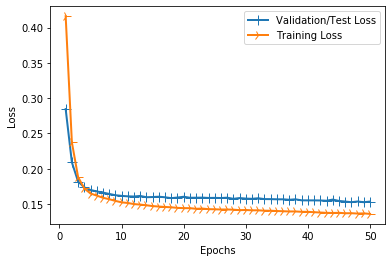

In [38]:
# Plotting Loss Charts
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# plt.figure(figsize=(12,8))
# ax = freq_series.plot(kind='line')
line1 = plt.plot(epochs, val_loss_values, label="Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label="Training Loss")
plt.setp(line1, linewidth=2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

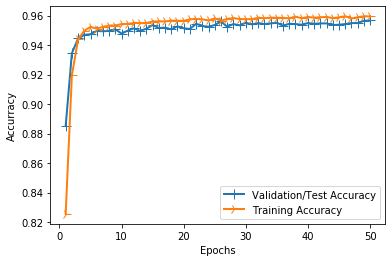

In [39]:
# Plotting Accuracy Charts
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

# plt.figure(figsize=(12,8))
# ax = freq_series.plot(kind='line')
line1 = plt.plot(epochs, val_acc_values, label="Validation/Test Accuracy")
line2 = plt.plot(epochs, acc_values, label="Training Accuracy")
plt.setp(line1, linewidth=2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Accurracy')

plt.legend()

plt.show()

In [48]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3401    8]
 [  49 1042]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3409
           1       0.99      0.96      0.97      1091

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



<h2>Review of Models</h2>

- Logistic Regression
- Random Forest Classifier (Winner)
- Deep Learning Model using TensorFlow

Three models were trained using about data to find the model which seemed to prvodie the best accuracy. Random Forest Classifier won in that it had an accuracy of 98.73% when compared to Logistic Regression with 78.47% and Deep Learning with an accurracy of less than 96%. 